In [1]:
# パッケージのインポート
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Activation, Dense, Dropout, Conv2D, Flatten, MaxPool2D
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# データセットの準備
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [3]:
# データセットのシェイプの確認
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


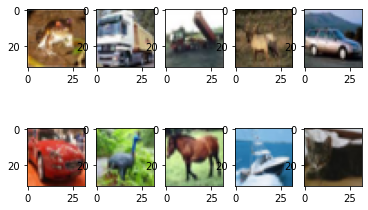

In [4]:
# データセットの画像の確認
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i])
plt.show()

In [5]:
# データセットのラベルの確認
print(train_labels[0:10])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


In [6]:
# データセットの画像の前処理
train_images = train_images.astype('float32')/255.0
test_images = test_images.astype('float32')/255.0

# データセットの画像の前処理後のシェイプの確認
print(train_images.shape)
print(test_images.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [7]:
# データセットのラベルの前処理
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# データセットのラベルの前処理後のシェイプの確認
print(train_labels.shape)
print(test_labels.shape)

(50000, 10)
(10000, 10)


In [8]:
#モデルの作成
model = Sequential()

# Conv→Conv→Pool→Dropout
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Conv→Conv→Pool→Dropout
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten→Dense→Dropout→Dense
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

2021-08-26 21:56:48.178250: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
# コンパイル
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['acc'])

/Users/kzyngkr/hobby/ML/ReinforcementLearning/venv/lib/python3.9/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [10]:
# 学習
history = model.fit(train_images, train_labels, batch_size=128,
    epochs=20, validation_split=0.1)

2021-08-26 21:56:49.607647: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
352/352 [==============================] - 92s 258ms/step - loss: 1.6579 - acc: 0.3908 - val_loss: 1.2752 - val_acc: 0.5470
Epoch 2/20
 24/352 [=>............................] - ETA: 1:15 - loss: 1.3138 - acc: 0.5316

KeyboardInterrupt: 

In [11]:
# モデルの保存
model.save('convolution.h5')


In [12]:
# グラフの表示
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

NameError: name 'history' is not defined

In [ ]:
# 評価
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('loss: {:.3f}\nacc: {:.3f}'.format(test_loss, test_acc ))

10000/10000 [==============================] - 21s 2ms/sample - loss: 0.6794 - acc: 0.7812
loss: 0.679
acc: 0.781


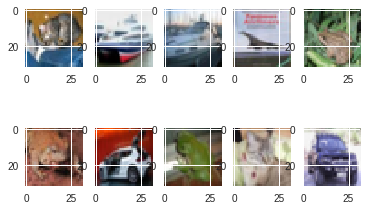

['cat', 'ship', 'ship', 'airplane', 'frog', 'frog', 'automobile', 'frog', 'cat', 'automobile']


In [ ]:
# 推論する画像の表示
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_images[i])
plt.show()

# 推論したラベルの表示
test_predictions = model.predict(test_images[0:10])
test_predictions = np.argmax(test_predictions, axis=1)
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
        'dog', 'frog', 'horse', 'ship', 'truck']
print([labels[n] for n in test_predictions])